___
# Capítulo 5 - Análise de outliers
## Seção 3 - Usando DBSCAN
___

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 7.5, 6
sns.set_style('whitegrid')

df = sns.load_dataset("iris")
cols = ['comp da cepa','larg  da cepa','comp da pétala','larg da pétala', 'espécie']
df.columns = cols
X = df[cols[:3]].values
y = df['espécie'].values

#### Treinando o modelo para identificar outliers

In [2]:
modelo = DBSCAN(eps=0.8, min_samples=19).fit(X)
print(modelo)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


#### Visualizando resultados

In [5]:
outliers_df = pd.DataFrame(X)

print(Counter(modelo.labels_))

print(outliers_df[modelo.labels_ ==-1])

Counter({1: 95, 0: 50, -1: 5})
       0    1    2
105  7.6  3.0  6.6
117  7.7  3.8  6.7
118  7.7  2.6  6.9
122  7.7  2.8  6.7
131  7.9  3.8  6.4


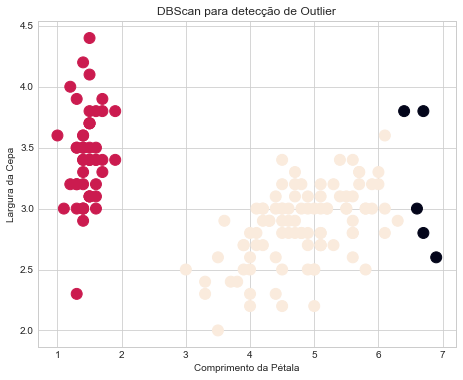

In [6]:
cores = modelo.labels_

plt.scatter(X[:,2], X[:,1], c=cores, s=120)
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Cepa')
plt.title('DBScan para detecção de Outlier')
plt.show()